# Сборный проект-1 #

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**

Проанализировать данные, провести исследовательский анализ данных, составить портрет пользователя для каждого региона и проверить такие гипотезы как:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Данные и общую информацию получу из файла `/datasets/games.csv`. О качестве данных в файлах пока не имеется информации. По этой причине, проведением исследований, необходимо провести обзор данных и изучить общую информацию.

Я проверю данные на пропущенные значения, ошибки и дублированные значения. На этапе предобработки данных, я поищу возможность исправить все ошибки в данных, которые могут привести к искажению конечного результата исследования. 
Создам необходимые столбцы, исправлю формат некоторых столбцов данных и приступлю к проведению исследовательского анализа.


Моё исследование будет проходить через следующие этапы:
- Обзор данных;
- Предобработка и подготовка данных;
- Проведение самого исслед. анализа;
- Проверка гипотез.



In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from scipy import stats

In [3]:
# Открываем файл с датафреймом
games = pd.read_csv('/datasets/games.csv')

games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выводим информацию датафрейма
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Подготовьте данные


In [5]:
# Проверяем на наличие дубликатов
duplicated_rows = games.duplicated().sum()
print("Количество дубликатов в данных:")
duplicated_rows

Количество дубликатов в данных:


0

Количество дубликатов в данных:
0

In [6]:
# Приводим названия столбцов к нижнему регистру
games.columns = map(str.lower, games.columns)

# Выводим информацию датафрейма
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Названия столбцов приведены к нижнему регистру

In [7]:
# Проверяем датафрейм на количество пустых значений
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

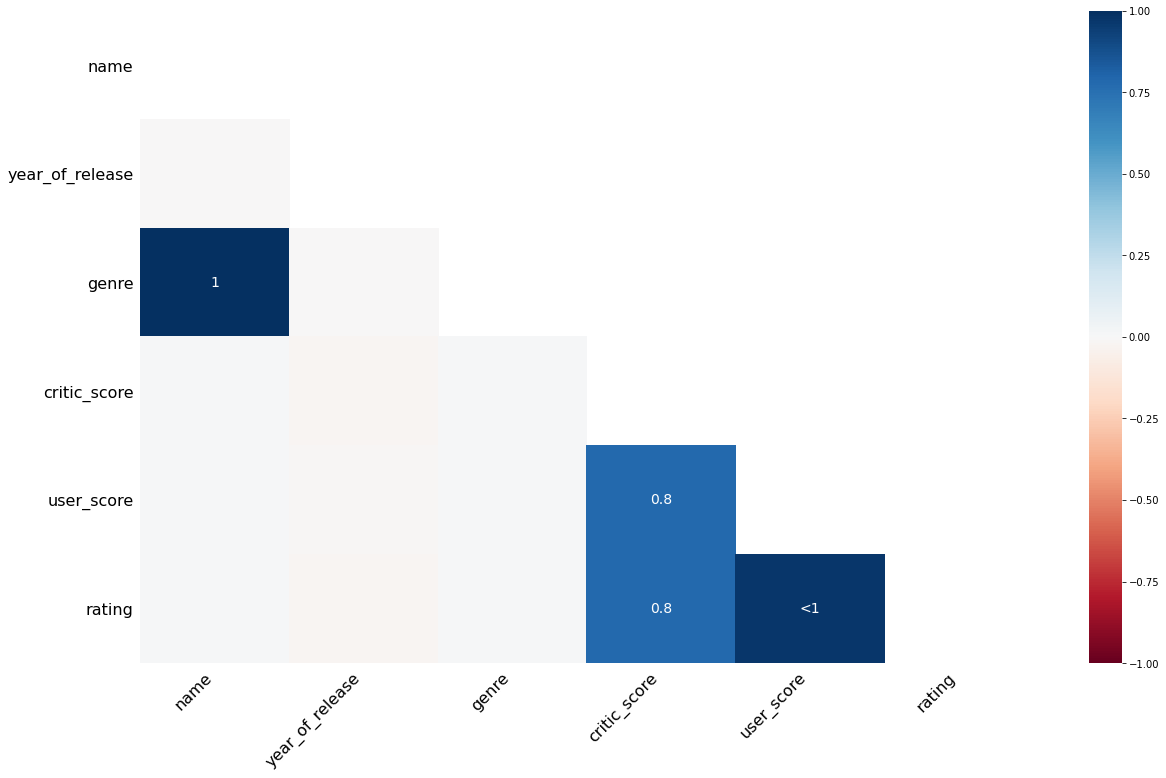

In [8]:
msno.heatmap(games)

In [9]:
# Выводим строки из файла, где в столбце 'name'
# есть пустые значения

games_nan_name = games.loc[games['name'].isna()]
games_nan_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Результат:

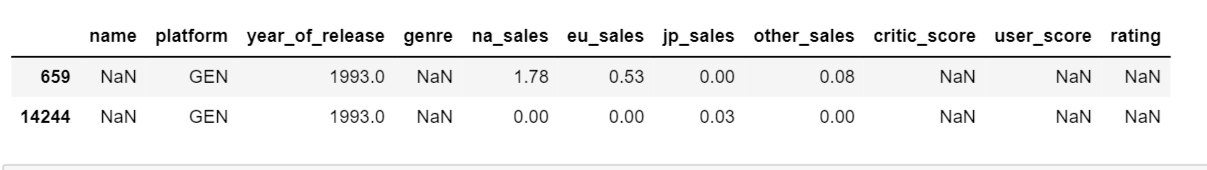

In [10]:
# Заменяем NaN значения в столбцах 'name' и 'genre' на "other"
games['name'].fillna('other', inplace=True)
games['genre'].fillna('other', inplace=True)

In [11]:
# Проверяем датафрейм на количество пустых значений
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<AxesSubplot:>

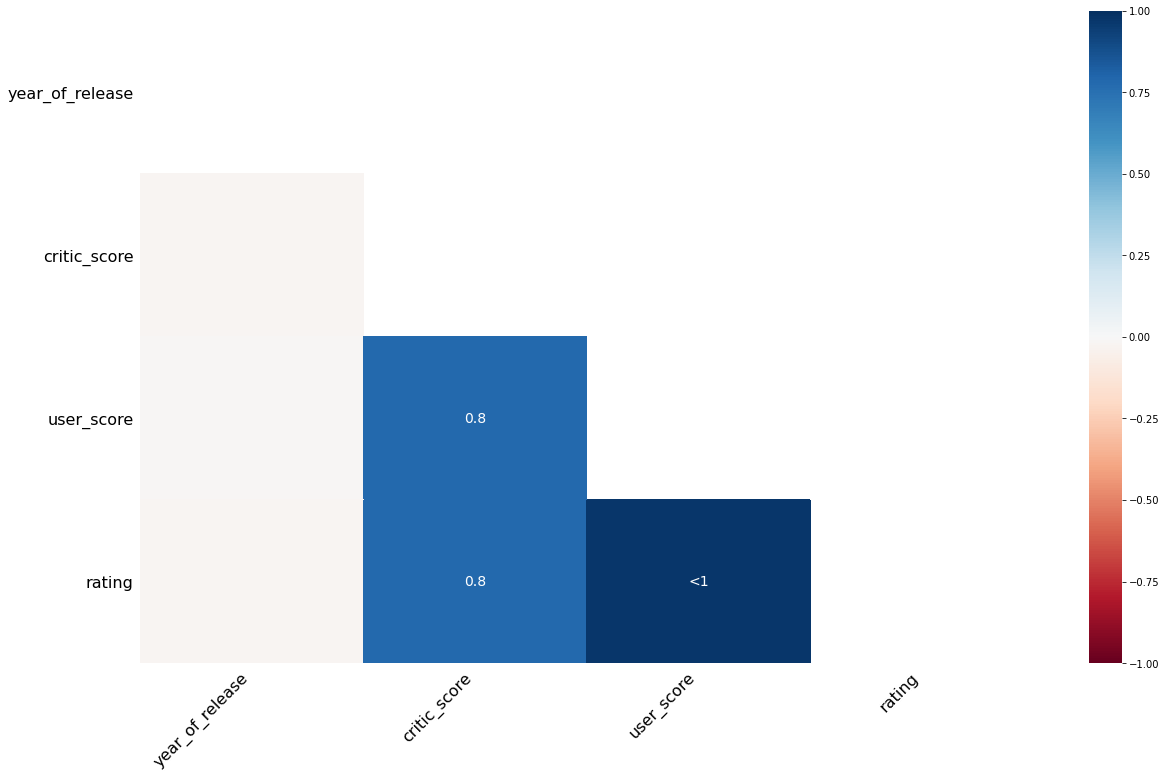

In [12]:
msno.heatmap(games)

Есть пустые значения в:

- year_of_release     269
- critic_score       8578
- user_score         6701
- rating             6766

In [13]:
# Выводим количество пустых значений в столбце 'year_of_release'
print("Количество пустых значений:")
games['year_of_release'].isna().sum()
# 269


Количество пустых значений:


269

Количество пустых значений: 269

In [14]:
# Выводим количество не пустых строк из столбца 'year_of_release'
print('Количество не пустых строк:')
display(games['year_of_release'].count())
# 16446

Количество не пустых строк:


16446

Количество не пустых строк: 16446

In [15]:
# Заменяем пустые значения столбца 'year_of_release' на 0 и устанавливаем
# тип данных как int
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)
games['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

В этом столбце 'year_of_release' тип данных был в формате float. Сменили формат на int, т.к. содержит в себе информацию о годах релиза


In [16]:
# Выводим количество пустых значений из столбца 'year_of_release'
print('Количество пустых значений:')
display(games['year_of_release'].isna().sum())

Количество пустых значений:


0

In [17]:
# Выводим количество пустых значений из столбца 'critic_score'
print("Количество пустых значений:")
display(games['critic_score'].isna().sum())

# И выводим количество не пустых строк
print("Количество не пустых строк:")
games['critic_score'].count()

Количество пустых значений:


8578

Количество не пустых строк:


8137

In [18]:
# Выводим описание столбца
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [19]:
# Выводим среднее значение столбца 'critic_score' 
games_critic_score_mean = games['critic_score'].mean()

print("Среднее столбца:")
games_critic_score_mean

Среднее столбца:


68.96767850559173

In [20]:
# Округляем среднее столбца 'critic_score' на 68.97
# rounded_critic_score_mean = round(games_critic_score_mean, 2)
# Код выше закоментирован

# Заполняем пустые значения в столбце на среднее
games['critic_score'] = games['critic_score'].fillna(games_critic_score_mean)
games['critic_score']

0        76.000000
1        68.967679
2        82.000000
3        80.000000
4        68.967679
           ...    
16710    68.967679
16711    68.967679
16712    68.967679
16713    68.967679
16714    68.967679
Name: critic_score, Length: 16715, dtype: float64

In [21]:
# Выводим количество пустых значений из столбца 'critic_score'
print("Количество пустых значений:")
display(games['critic_score'].isna().sum())

Количество пустых значений:


0

In [22]:
# Выводим количество пустых значений из столбца 'user_score'
print('Количество пустых значений:')
games['user_score'].isna().sum()

Количество пустых значений:


6701

In [23]:
# Выводим описание столбца
games['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [24]:
# Заменяем 'tbd' на nan значения
games['user_score'].replace('tbd', np.nan, inplace=True)

# Устанавливаем тип данных столбца как float
games['user_score'] = games['user_score'].astype(float)

# Выводим среднее столбца 'user_score'
games_user_score_mean = games['user_score'].mean()
print("Среднее:")
display(games_user_score_mean)

# Округляем среднее 7.125046113306982 на 2 значения после точки
# rounded_user_score_mean = round(games_user_score_mean, 2)
# Код выше закоментирован

# Заменяем пустые значения на округленное среднее столбца
games['user_score'] = games['user_score'].fillna(games_user_score_mean)
print("Количество пустых значений в столбце:")
games['user_score'].isna().sum()

Среднее:


7.125046113306982

Количество пустых значений в столбце:


0

**Описание**

'tbd' обычно означает "будет определено" (to be determined) и обычно используется в игровых рейтингах вместо реального числового рейтинга. Тип данных в данном столбце изменен на float, т.к. используется формат с плавающей точкой

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

<AxesSubplot:>

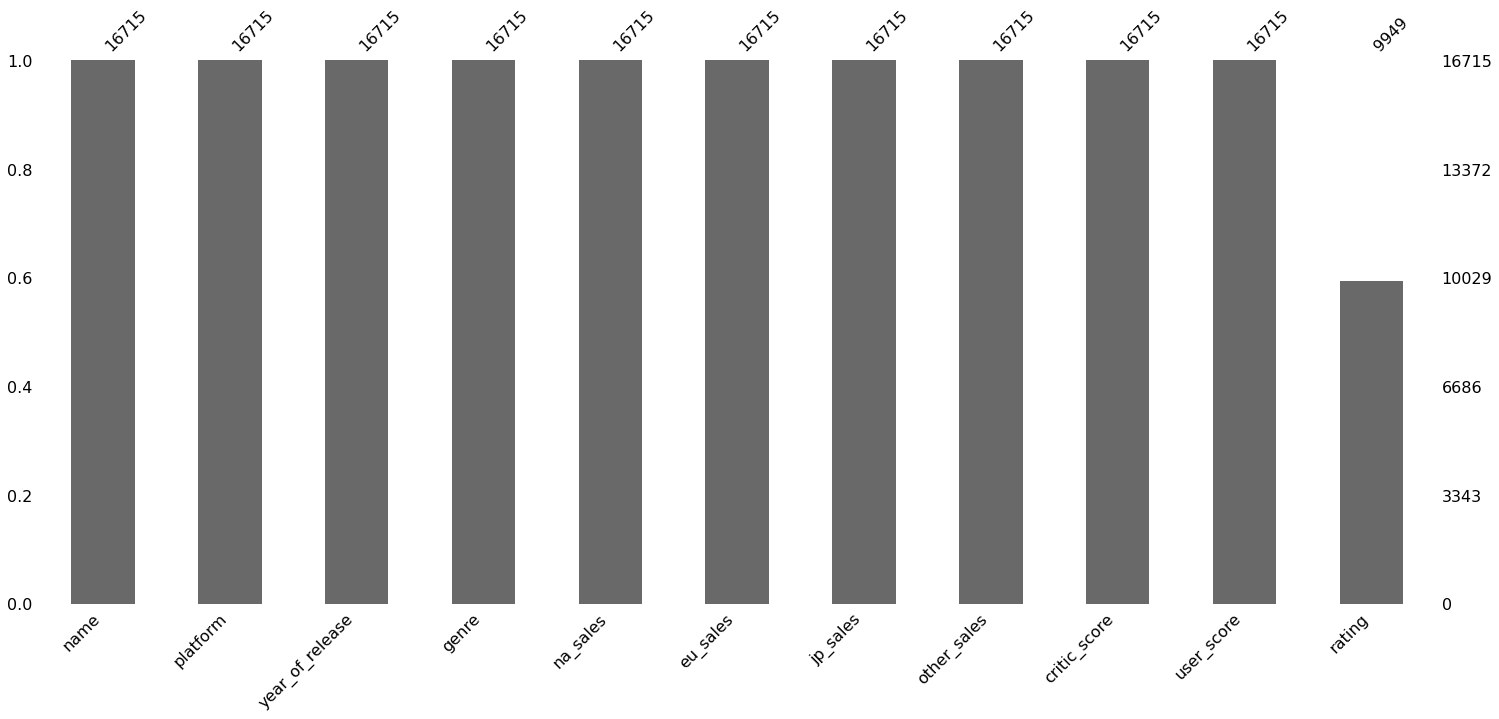

In [25]:
# Выводим количество пустых значений в каждых столбцах
display(games.isna().sum())

msno.bar(games)

In [26]:
# games['rating'].describe()

# Проверяем rating
rating_counts = games['rating'].value_counts()
rating_counts

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [27]:
# Заменяем NaN значения в столбце 'rating' на "Other"
games['rating'].fillna('Other', inplace=True)

# Проверяем rating повторно
rating_counts_2 = games['rating'].value_counts()
rating_counts_2

Other    6766
E        3990
T        2961
M        1563
E10+     1420
EC          8
RP          3
K-A         3
AO          1
Name: rating, dtype: int64

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

<AxesSubplot:>

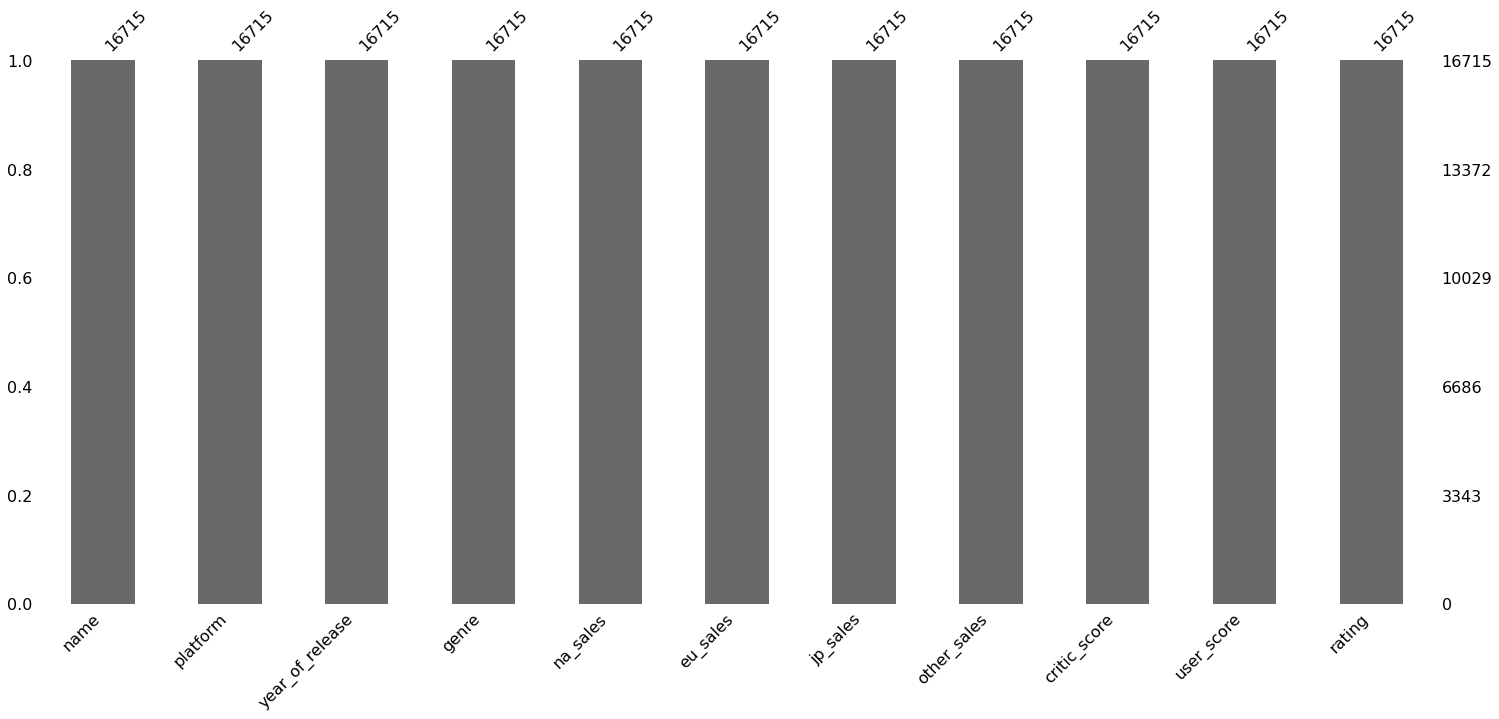

In [28]:
display(games.isna().sum())

msno.bar(games)

In [29]:
# Объявляем новый столбец в датафрейме и записываем
# суммарные продажами во всех регионах
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,Other,31.38


Столбец 'total_sales' добавлен

**Промежуточный вывод:**

- В исходном файле не оказалось явных дубликатов;
- Названия столбцов приведены в нижний регистр;
- Пустые значения были обнаружены в:
  - name                  2;
  - year_of_release     269;
  - genre                 2;
  - critic_score       8578;
  - user_score         6701;
  - rating             6766.
- Пустые значения были исправлены, путем замены на среднее значения;
  

# Проведите исследовательский анализ данных #

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,Other,31.38


In [31]:
# Преобразуем серию games_per_year в DataFrame с двумя столбцами
games_per_year_df = games['year_of_release'].value_counts().reset_index()

# Переименовываем столбцы для более понятного отображения
games_per_year_df.columns = ['year_of_release', 'games_count']

# Выводим результат
display(games_per_year_df.head())


,year_of_release,games_count
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136


Исходя из результата при сотритровании годов по выпущенным релизам, можно понять, что в 2008 году было самое большое количество `1427` релизов игр.

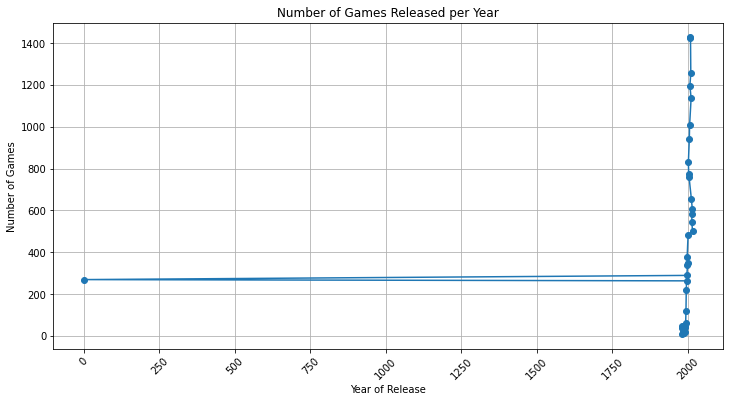

In [32]:
# Построение графика количества выпущенных игр по годам
plt.figure(figsize=(12, 6))
plt.plot(games_per_year_df['year_of_release'], games_per_year_df['games_count'], marker='o', linestyle='-')
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [33]:
# Суммируем продажи по каждой платформе
platform_sales = games.groupby('platform')['total_sales'].sum()

# Выбираем топ-N платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(5)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

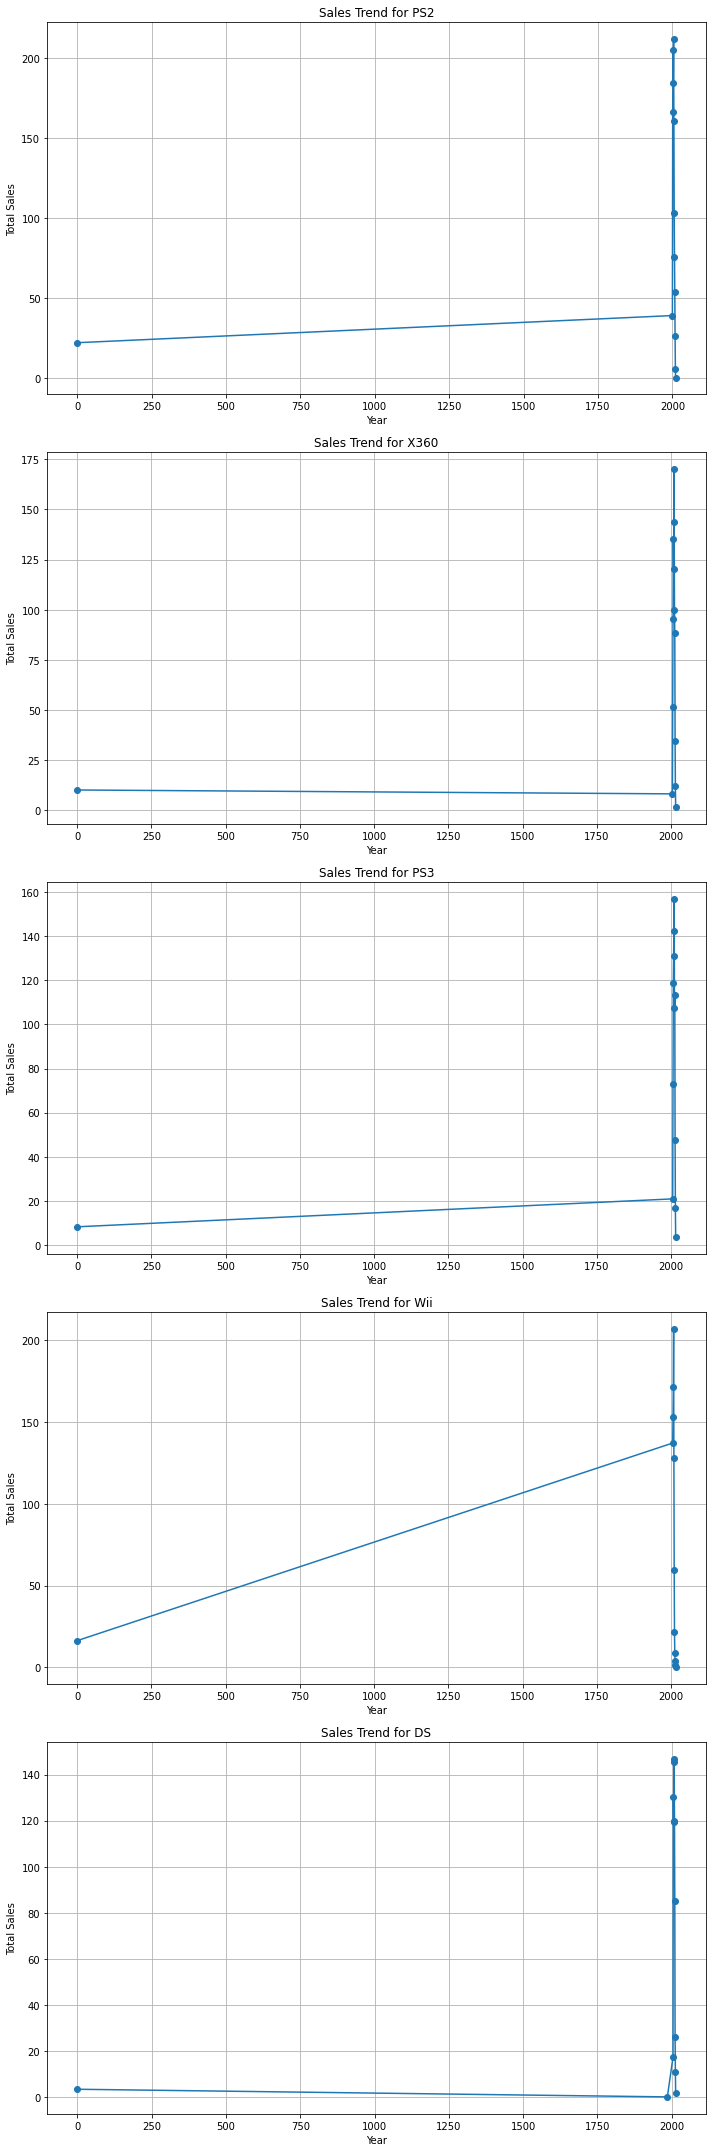

In [34]:
# Задаем количество топ-платформ для анализа
N = 5

# Суммируем продажи по каждой платформе
platform_sales = games.groupby('platform')['total_sales'].sum()

# Выбираем топ-N платформ с наибольшими суммарными продажами
top_platforms = platform_sales.nlargest(N)

# Получаем имена топ-N платформ
top_platforms_names = top_platforms.index

# Создаем подграфики для каждой платформы
fig, axes = plt.subplots(nrows=N, figsize=(10, 6*N))

# Построение временных рядов для каждой платформы
for i, platform in enumerate(top_platforms_names):
    platform_data = games[games['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    platform_sales_by_year.plot(ax=axes[i], marker='o', linestyle='-')
    axes[i].set_title(f"Sales Trend for {platform}")
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Total Sales')
    axes[i].grid(True)

# Размещение подграфиков
plt.tight_layout()
plt.show()


Исходя из выше построенных графиков можно понять, что могут быть искажения при указании года релиза

Посчитаем количество релизов до 1960 годов. Код ниже:

In [35]:
games_year_of_release_query = games.query('year_of_release <= 1960').count()
# games_year_of_release_query['year_of_release'].describe()
games_year_of_release_query

name               269
platform           269
year_of_release    269
genre              269
na_sales           269
eu_sales           269
jp_sales           269
other_sales        269
critic_score       269
user_score         269
rating             269
total_sales        269
dtype: int64

Количество релизов до 1960 года `269`

Посчитаем, сколько это будет в процентном соотношении к общему количеству данных исходного файла:

In [36]:
1 - games.shape[0]/(16715 - 269)

-0.01635656086586401

Результат:
1.64%

При проведении анализа данных, можно терять (удалять) данные до 10%, чтобы не потерять реальную "цену" данных

По этой причине, удаляем данные о релизах до 1960 года

Код удаления данных до 1960 года, ниже:

In [37]:
games_y_of_rel_drop = games['year_of_release'] <= 1960 
condition_year_of_release = games.drop(games[games_y_of_rel_drop].index, inplace=True)

Теперь проверим на наличие данных о релизе до 1960 года:

In [38]:
games_year_of_release_query_2 = games.query('year_of_release <= 1960').count()
games_year_of_release_query_2

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

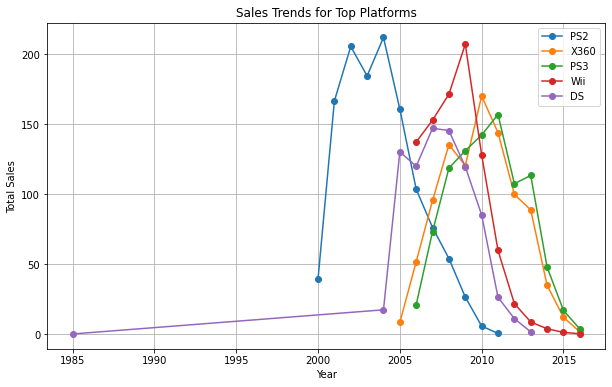

In [39]:
# Задаем количество топ-платформ для анализа
N = 5

# Получаем топ-N платформ с наибольшими суммарными продажами
platform_sales = games.groupby('platform')['total_sales'].sum()
top_platforms = platform_sales.nlargest(N)
top_platforms_names = top_platforms.index

# Создаем новый график
plt.figure(figsize=(10, 6))

# Построение временных рядов для каждой платформы
for platform in top_platforms_names:
    platform_data = games[games['platform'] == platform]
    platform_sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_sales_by_year.index, platform_sales_by_year.values, marker='o', linestyle='-', label=platform)

# Добавляем подписи к осям и заголовок
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trends for Top Platforms')
plt.grid(True)
plt.legend()

# Отображаем график
plt.show()


За какой характерный срок появляются новые и исчезают старые платформы?

Исходя из выше построенного распределения, можно сделать вывод, что срок появления новых и исчезновение старых платформ происходит в среднем в течении 10 лет.

In [40]:
# Фильтрация данных за 2016 год
# data_in_2016 = games[games['year_of_release'] == 2016]

# Вывод информации о данных за 2016 год
# print("Количество строк в данных за 2016 год:", data_in_2016.shape[0])

In [41]:
# Фильтрация данных за последние 3 года
data_from_2013 = games[games['year_of_release'] >= 2013]

# Вывод информации о данных за 2016 год
print("Количество строк в данных с 2013 года:", data_from_2013.shape[0])

Количество строк в данных с 2013 года: 2233


In [42]:
# Получаем данные только для платформ из списка топ-N
platform_data = games[games['platform'].isin(top_platforms_names)]

# Получаем топ компаний для каждой платформы и сортируем по продажам
top_companies_by_platform = platform_data.groupby(['platform', 'name'])['total_sales'].sum()
top_companies_by_platform = top_companies_by_platform.groupby(level=0).nlargest(1).reset_index(level=0, drop=True)
top_companies_by_platform = top_companies_by_platform.reset_index().sort_values(by='total_sales', ascending=False).set_index('platform')

print("Топ компаний с продажами по топ платформам:")
print(top_companies_by_platform)


Топ компаний с продажами по топ платформам:
                                   name  total_sales
platform                                            
Wii                          Wii Sports        82.54
DS                New Super Mario Bros.        29.80
X360                 Kinect Adventures!        21.82
PS3                  Grand Theft Auto V        21.05
PS2       Grand Theft Auto: San Andreas        20.81


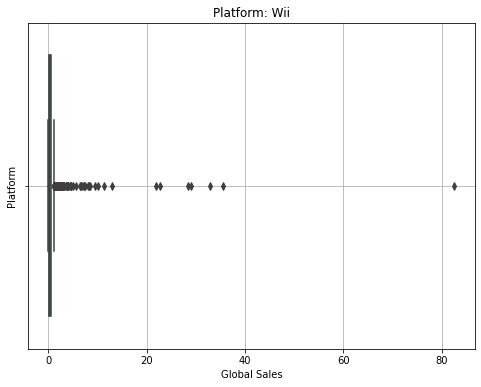

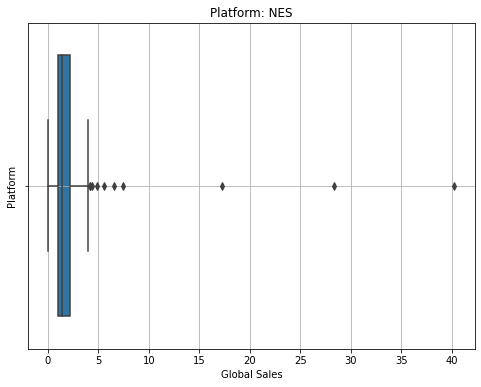

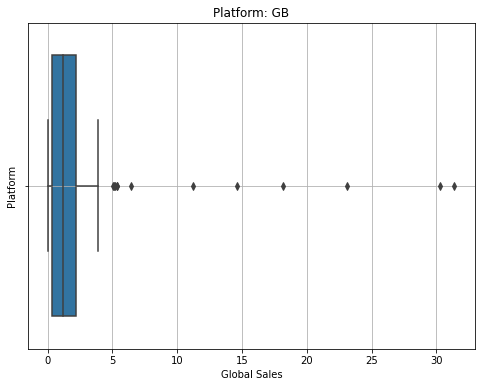

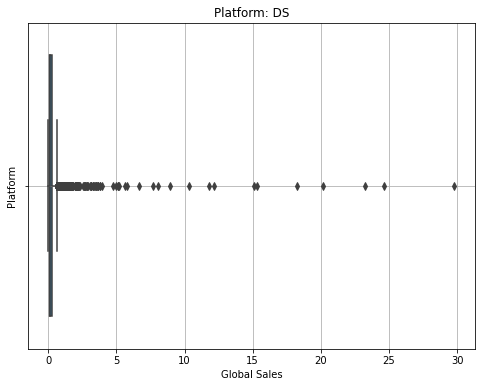

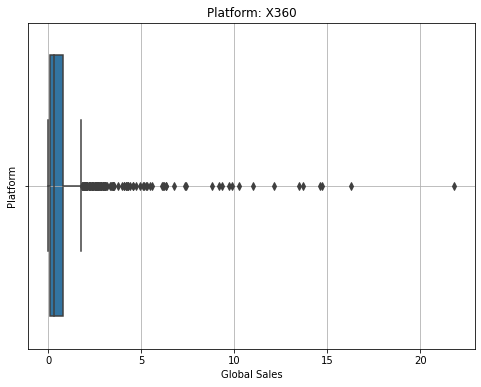

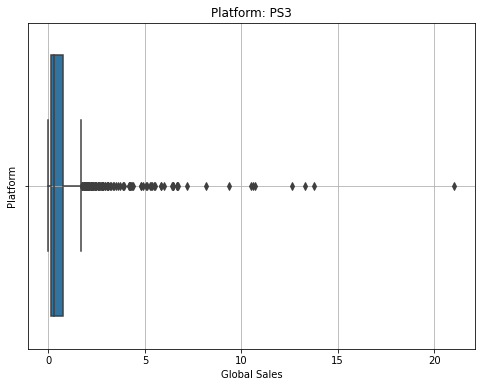

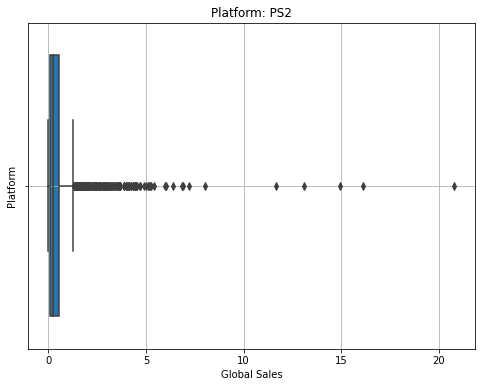

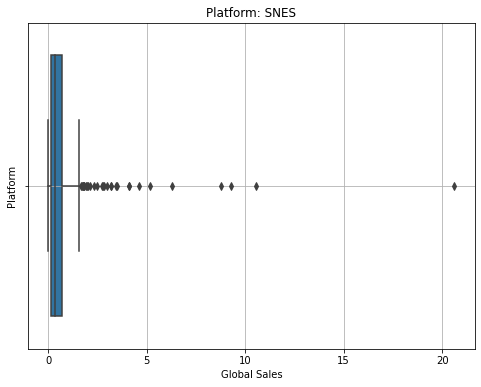

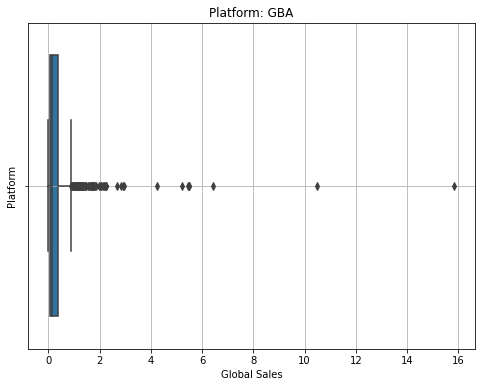

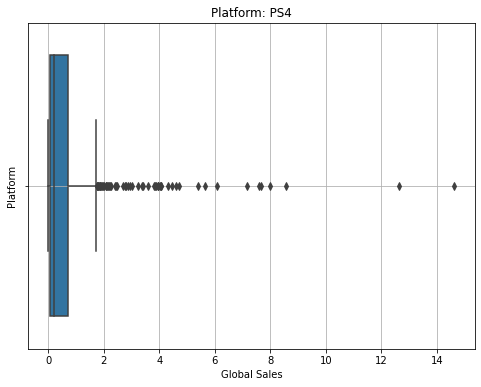

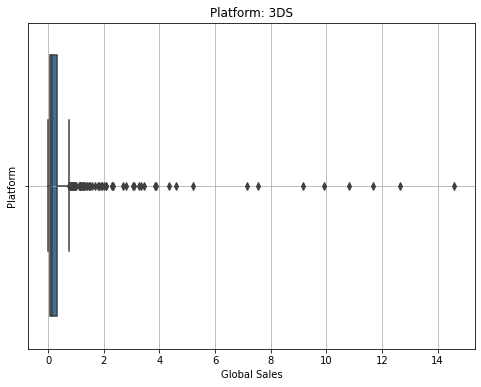

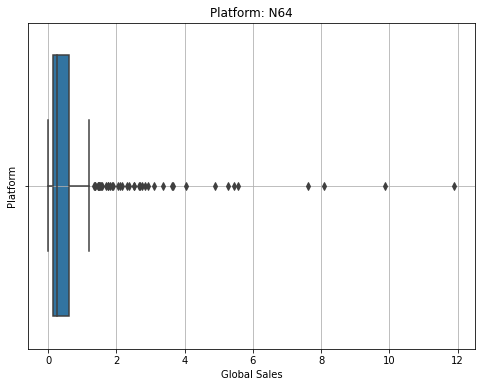

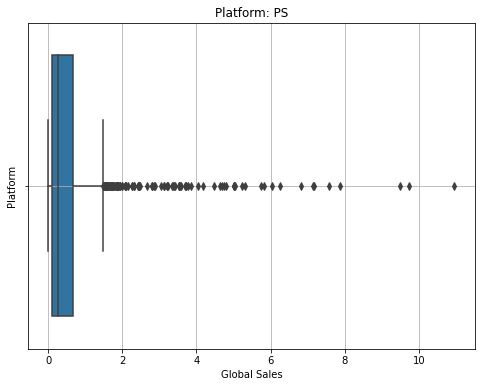

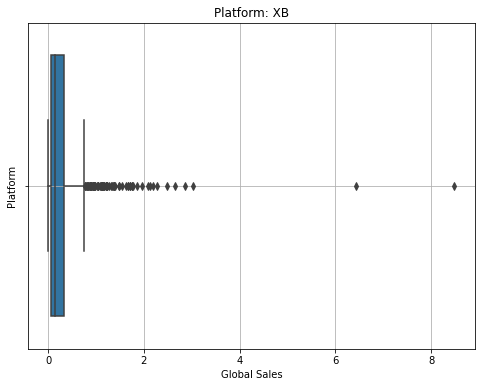

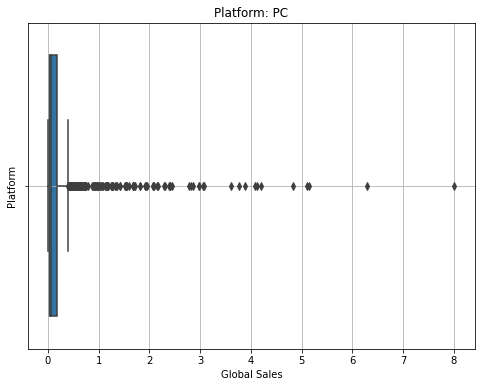

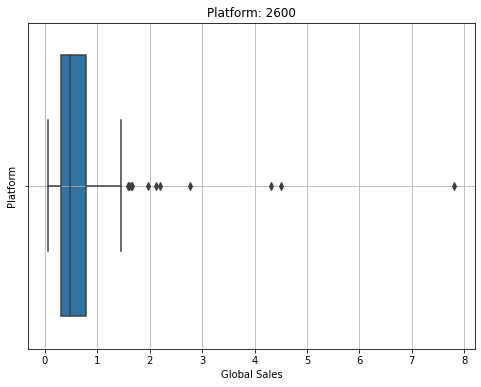

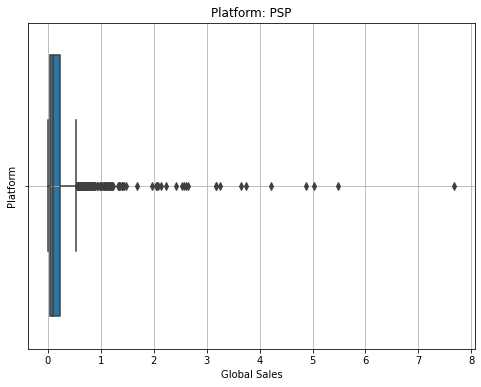

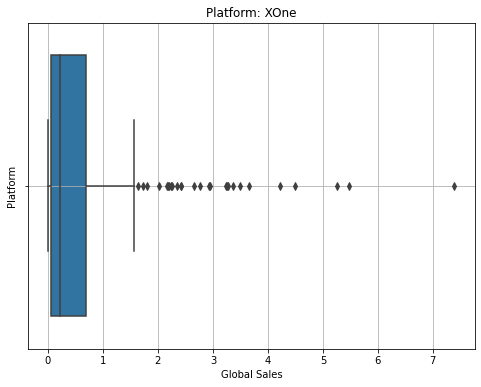

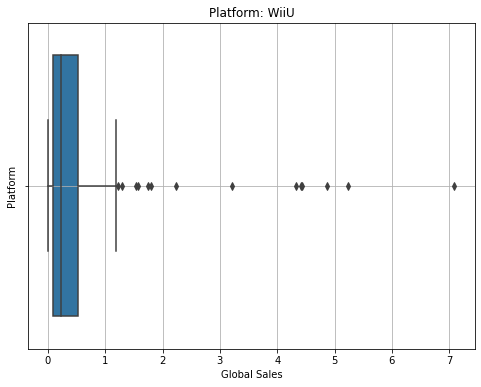

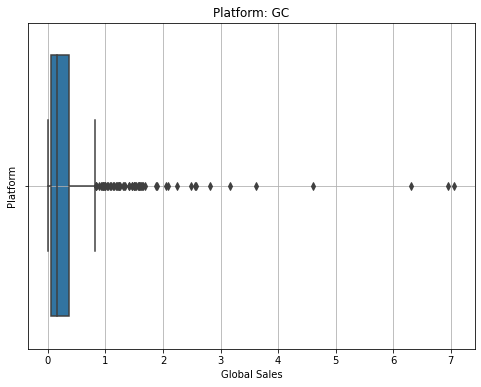

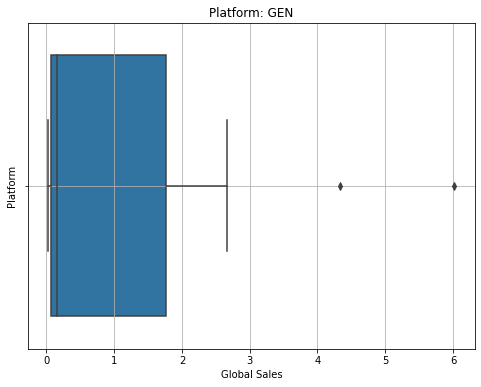

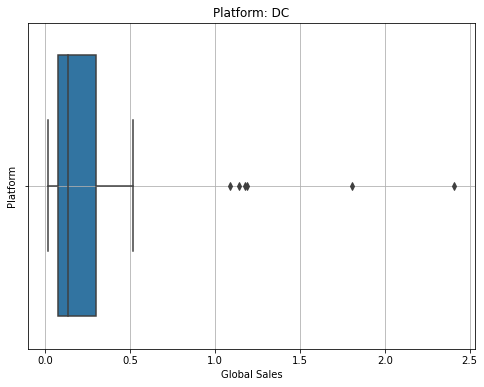

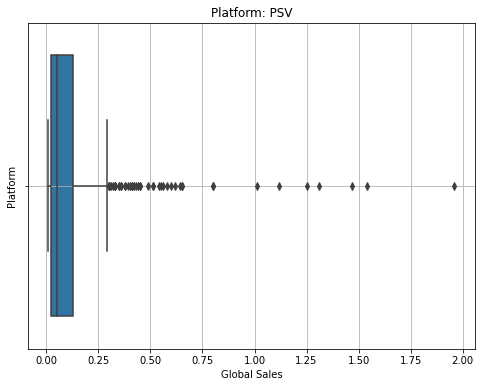

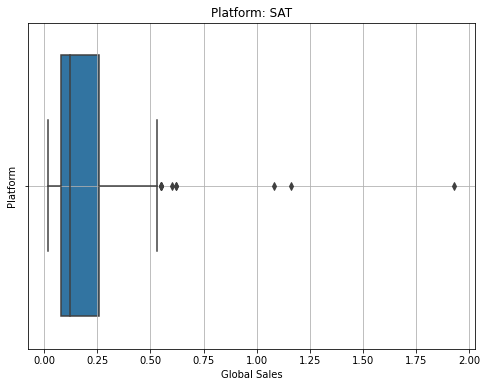

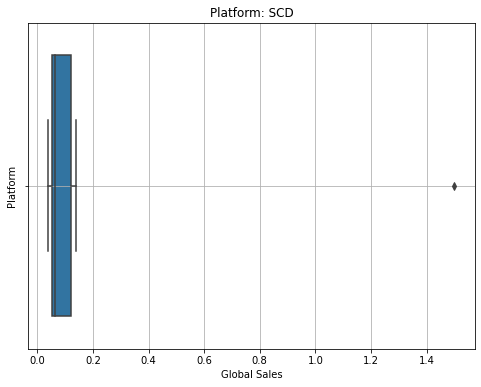

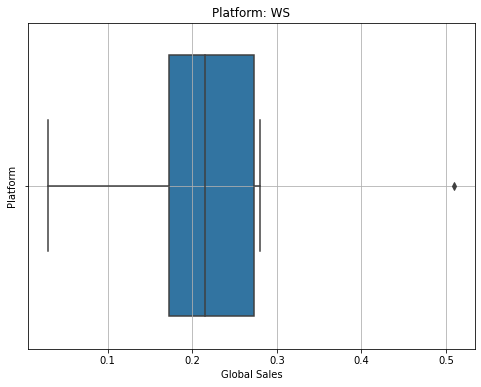

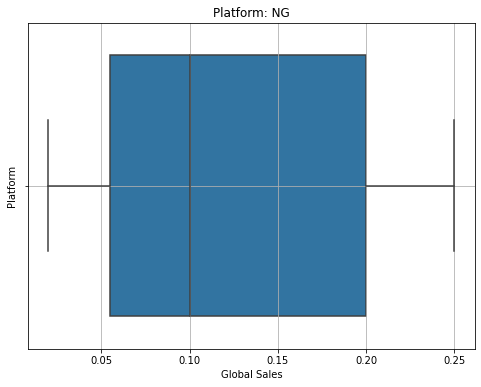

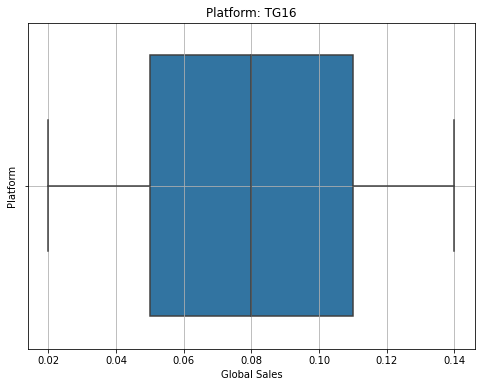

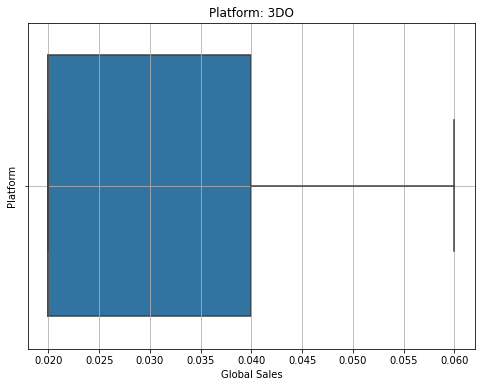

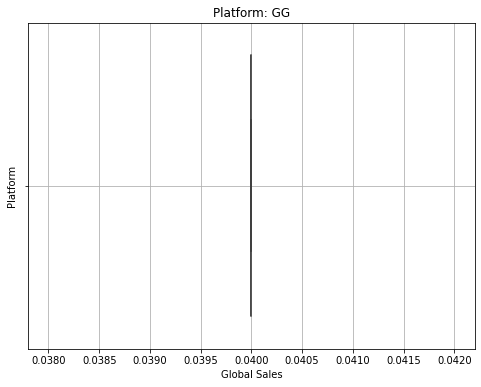

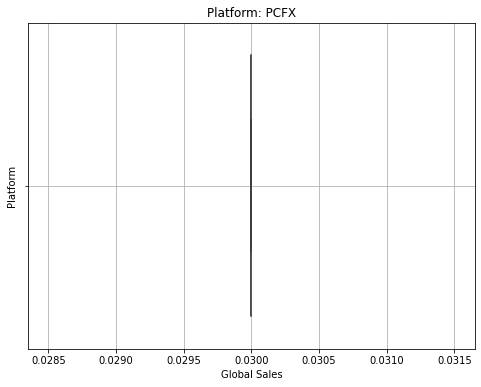

In [43]:
# Создаем графики "ящик с усами" для каждой платформы отдельно
# plt.figure(figsize=(15, 8))
for platform in games['platform'].unique():
    plt.figure(figsize=(8, 6))
    platform_data = games[games['platform'] == platform]
    sns.boxplot(x='total_sales', data=platform_data, ax=plt.gca())
    plt.title(f'Platform: {platform}')
    plt.xlabel('Global Sales')
    plt.ylabel('Platform')
    plt.grid(True)
    plt.show()


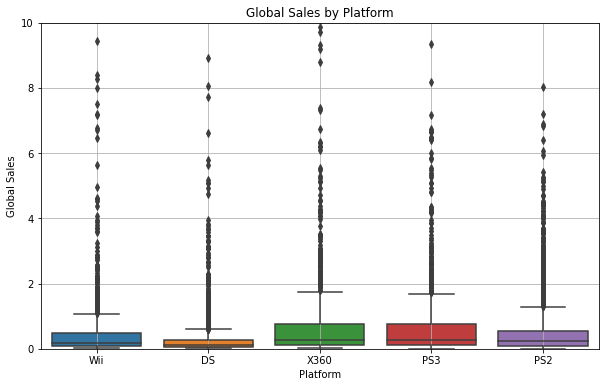

In [44]:
# Выбираем пять наиболее перспективных платформ
top_platforms = games.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()

# Фильтруем данные только для выбранных платформ
top_platform_data = games[games['platform'].isin(top_platforms)]

# Строим график "ящик с усами" для пяти платформ на одном графике
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=top_platform_data)
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.ylim(0, 10)  # Ограничиваем ось y до 10 для лучшей видимости основных данных
plt.grid(True)
plt.show()


Задание:
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Ответ:
Исходя из выше построенных boxplot диаграмм ("Ящик с усами"), как различаются продажи игр на пяти популярных платформах. Каждая платформа имеет свой уровень успешности, отраженный в различной высоте ящиков и усов.

In [45]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Other,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.967679,7.125046,Other,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,Other,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,68.967679,7.125046,Other,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,68.967679,7.125046,Other,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.967679,7.125046,Other,0.01


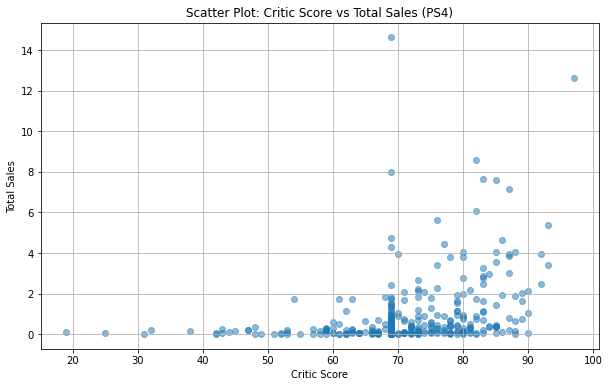

Корреляция между отзывами критиков и продажами (PS4): 0.3490095802924567


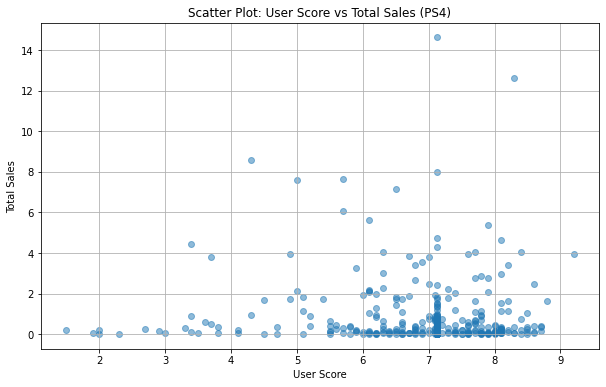

Корреляция между отзывами пользователей и продажами (PS4): -0.045390861003324096


In [46]:
# Выбираем данные для платформы "PS4"
ps4_data = games[games['platform'] == 'PS4']

# Строим диаграмму рассеяния для отзывов критиков и продаж
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Scatter Plot: Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Вычисляем корреляцию между отзывами критиков и продажами
critic_correlation = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print("Корреляция между отзывами критиков и продажами (PS4):", critic_correlation)

# Строим диаграмму рассеяния для отзывов пользователей и продаж
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Scatter Plot: User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Вычисляем корреляцию между отзывами пользователей и продажами
user_correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])
print("Корреляция между отзывами пользователей и продажами (PS4):", user_correlation)


In [47]:
games['platform'].nunique()

31

In [48]:
games_PS2 = games.query('platform == "PS2"')
games_PS2['total_sales'].describe()

count    2127.000000
mean        0.579953
std         1.138461
min         0.000000
25%         0.080000
50%         0.230000
75%         0.560000
max        20.810000
Name: total_sales, dtype: float64

In [49]:
games_NES = games.query('platform == "NES"')
display(games_NES['total_sales'].describe())
games_NES


count    98.000000
mean      2.561735
std       5.108012
min       0.060000
25%       1.000000
50%       1.375000
75%       2.222500
max      40.240000
Name: total_sales, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.967679,7.125046,Other,40.24
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,68.967679,7.125046,Other,28.31
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,68.967679,7.125046,Other,17.28
98,Super Mario Bros. 2,NES,1988,Platform,5.39,1.18,0.70,0.19,68.967679,7.125046,Other,7.46
124,The Legend of Zelda,NES,1986,Action,3.74,0.93,1.69,0.14,68.967679,7.125046,Other,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...
5858,Famista '91,NES,1990,Sports,0.00,0.00,0.30,0.00,68.967679,7.125046,Other,0.30
6139,Famista '92,NES,1991,Sports,0.00,0.00,0.28,0.00,68.967679,7.125046,Other,0.28
10290,Final Fantasy I & II,NES,1994,Role-Playing,0.00,0.00,0.11,0.00,68.967679,7.125046,Other,0.11
12022,Teenage Mutant Ninja Turtles: Tournament Fighters,NES,1992,Fighting,0.04,0.01,0.02,0.00,68.967679,7.125046,Other,0.07


In [50]:
# Список платформ
platforms = ['Xbox One', 'Nintendo Switch', 'PC', 'X360', 'PS3']  # Примеры платформ, которые вы хотите исследовать

# Создадим словарь, в котором ключами будут имена платформ, а значениями - данные для соответствующих платформ
platform_data_dict = {}

# Получим данные для каждой платформы и добавим их в словарь
for platform in platforms:
    platform_data_dict[platform] = games[games['platform'] == platform]


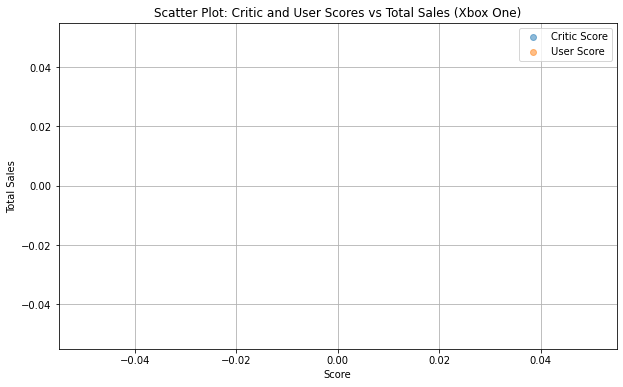

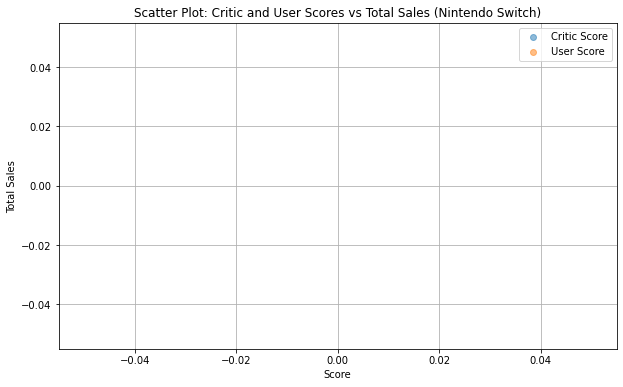

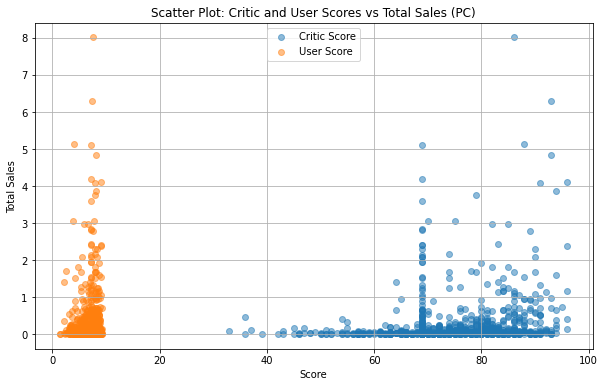

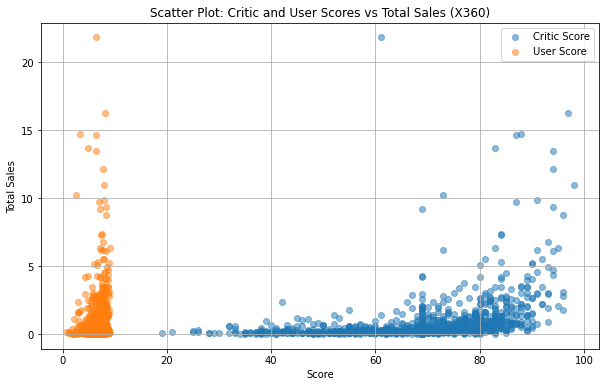

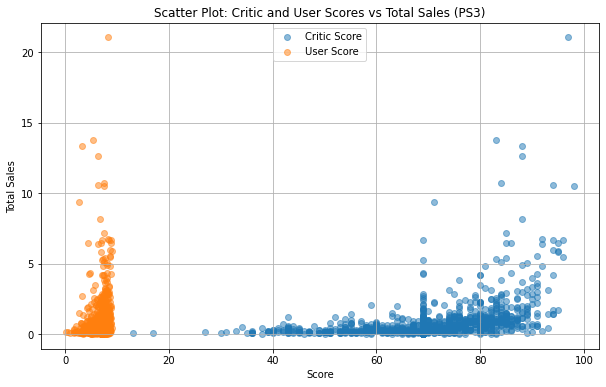

In [51]:
# Проходим по каждой платформе в словаре и строим диаграмму рассеяния для отзывов критиков и пользователей
for platform, data in platform_data_dict.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(data['critic_score'], data['total_sales'], alpha=0.5, label='Critic Score')
    plt.scatter(data['user_score'], data['total_sales'], alpha=0.5, label='User Score')
    plt.title(f'Scatter Plot: Critic and User Scores vs Total Sales ({platform})')
    plt.xlabel('Score')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


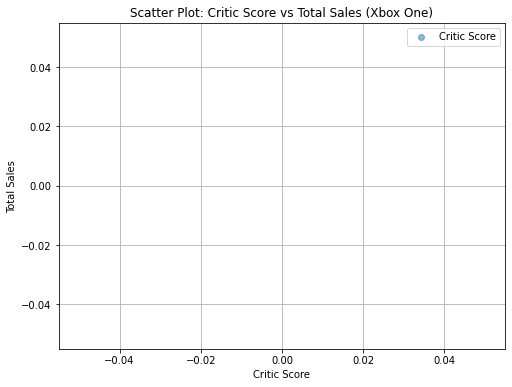

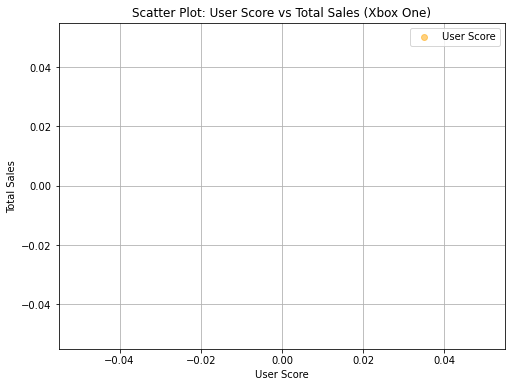

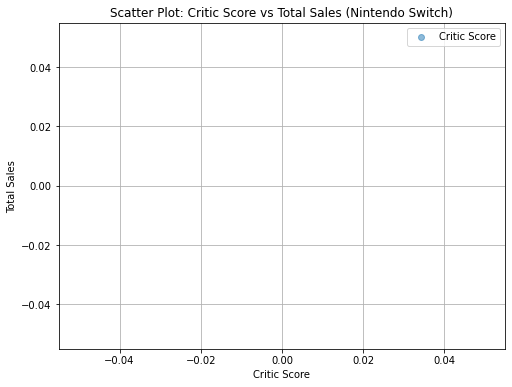

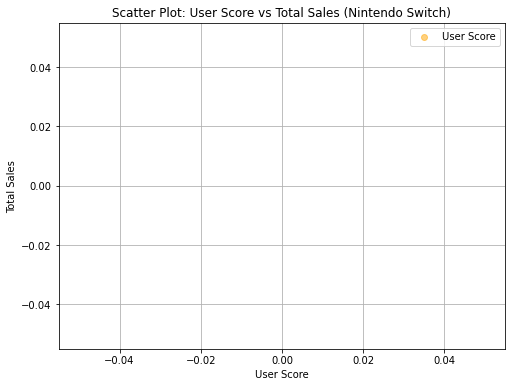

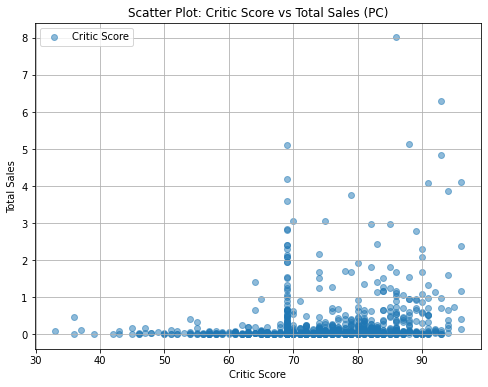

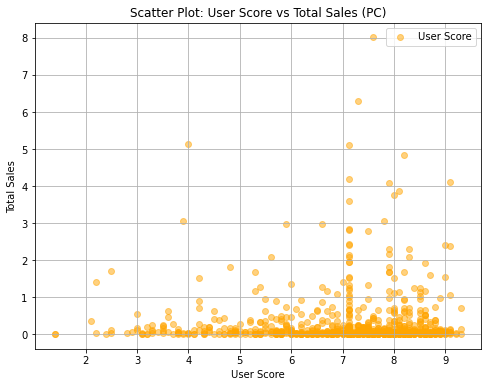

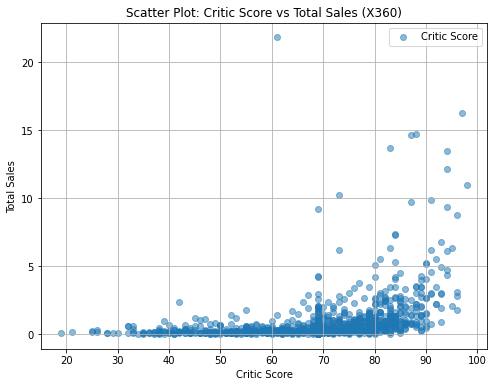

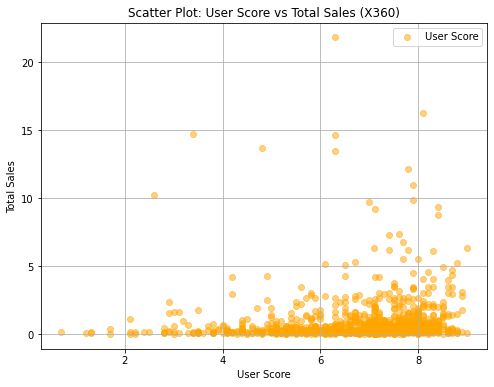

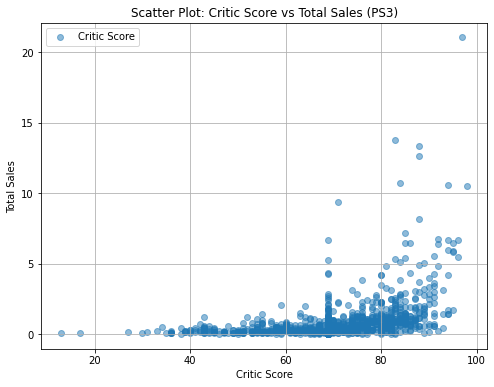

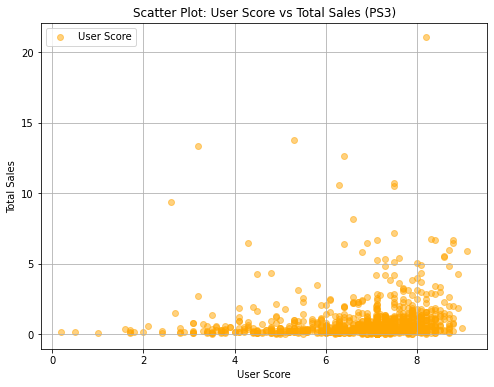

In [52]:
# Проходим по каждой платформе в словаре и строим два отдельных графика рассеяния для отзывов критиков и пользователей
for platform, data in platform_data_dict.items():
    plt.figure(figsize=(8, 6))
    
    # График для оценок критиков
    plt.scatter(data['critic_score'], data['total_sales'], alpha=0.5, label='Critic Score')
    plt.title(f'Scatter Plot: Critic Score vs Total Sales ({platform})')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # График для оценок пользователей
    plt.figure(figsize=(8, 6))
    plt.scatter(data['user_score'], data['total_sales'], alpha=0.5, label='User Score', color='orange')
    plt.title(f'Scatter Plot: User Score vs Total Sales ({platform})')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


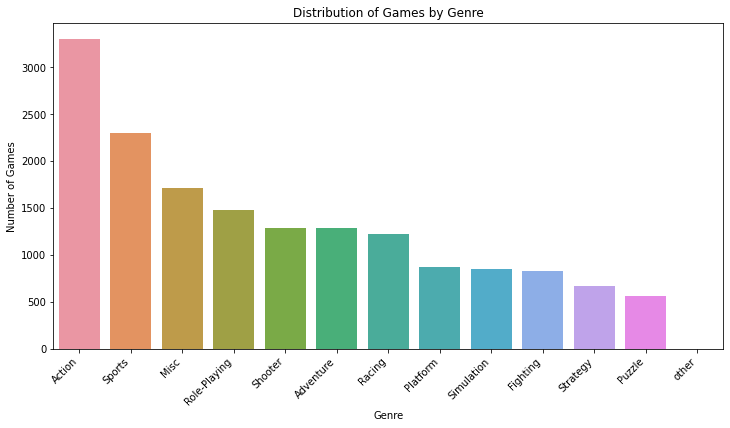

In [53]:
# Построение графика распределения количества игр по жанрам
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=games, order=games['genre'].value_counts().index)
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.show()


Медианные продажи по жанрам:
genre
other           1.21
Platform        0.27
Shooter         0.24
Sports          0.22
Fighting        0.21
Action          0.19
Racing          0.19
Role-Playing    0.18
Misc            0.16
Simulation      0.15
Puzzle          0.10
Strategy        0.10
Adventure       0.05
Name: total_sales, dtype: float64


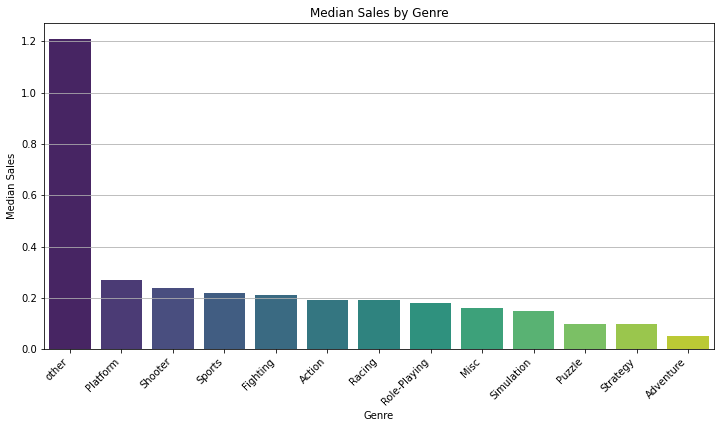

In [54]:
# Рассчитываем медианные продажи для каждого жанра
genre_median_sales = games.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Выводим результаты
print("Медианные продажи по жанрам:")
print(genre_median_sales)

# Строим график распределения медианных продаж по жанрам
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_median_sales.index, y=genre_median_sales.values, palette='viridis')
plt.title('Median Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


Средние продажи по жанрам:
genre
other           1.210000
Platform        0.940262
Shooter         0.803519
Role-Playing    0.628683
Racing          0.590122
Sports          0.567940
Fighting        0.528865
Action          0.519057
Misc            0.459204
Simulation      0.452695
Puzzle          0.421599
Strategy        0.256419
Adventure       0.180456
Name: total_sales, dtype: float64


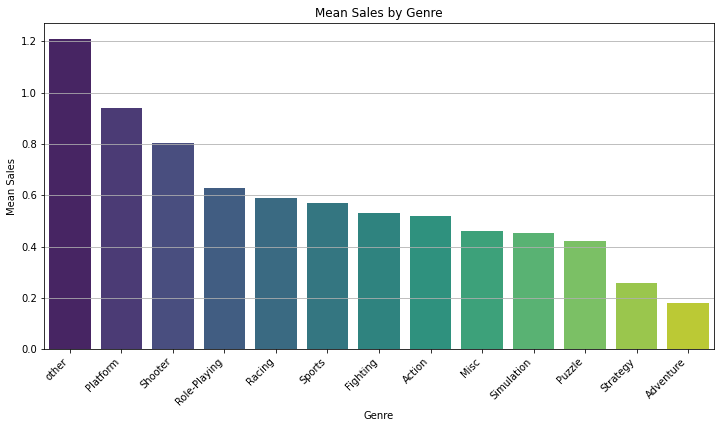

In [55]:
# Рассчитываем средние продажи для каждого жанра
genre_mean_sales = games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Выводим результаты
print("Средние продажи по жанрам:")
print(genre_mean_sales)

# Строим график распределения средних продаж по жанрам
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_mean_sales.index, y=genre_mean_sales.values, palette='viridis')
plt.title('Mean Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


**Промежуточный вывод:**

- Самое большое количество релизов игр было в `2008` - `1427`;
- Наибольшое суммарные продажи были у `PS2` в количестве `1233.56`;
- Удалены данные о релизах до 1960 года;
- Срок появления новых и исчезновение старых платформ происходит в среднем в течении 10 лет;
- Количество строк в данных за последние 3 года: `2233`;
- Топ компания с продажами по платформам это `Wii` - `82.54`;
- Каждая платформа имеет свой уровень успешности;
- Корреляция между отзывами (PS4):
  -  критиков и продажами `0.3490095802924567`
  -  пользователей и продажами `-0.045390861003324096`
- Медианные и средние продажи по жанрам не отличаются. Топ-1 по продажам занимает:
  - `other` - `1.21`.
  


# Составьте портрет пользователя каждого региона


In [56]:
# Самые популярные платформы в регионе NA (North America)
top_platforms_na = games.groupby('platform')['na_sales'].sum().nlargest(5)
print("Самые популярные платформы в регионе NA:")
print(top_platforms_na)

Самые популярные платформы в регионе NA:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64


Самые популярные платформы в регионе NA:

1. X360 - 595.74
2. PS2 - 572.92
3. Wii - 486.87
4. PS3 - 390.13
5. DS - 380.31

In [57]:
# Самые популярные платформы в регионе EU (Europe)
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().nlargest(5)
print("\nСамые популярные платформы в регионе EU:")
print(top_platforms_eu)



Самые популярные платформы в регионе EU:
platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64


Самые популярные платформы в регионе EU:

1. PS2 - 332.63
2. PS3 - 327.21
3. X360 - 268.32
4. Wii - 258.32
5. PS - 212.39

In [58]:
# Самые популярные платформы в регионе JP (Japan)
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().nlargest(5)
print("\nСамые популярные платформы в регионе JP:")
print(top_platforms_jp)



Самые популярные платформы в регионе JP:
platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


Самые популярные платформы в регионе JP:

DS - 175.02
PS - 139.78
PS2 - 137.54
SNES - 116.55
3DS - 100.62


In [59]:
# Определяем самые популярные жанры (топ-5) для каждого региона
top_genres_na = games.groupby('genre')['na_sales'].sum().nlargest(5)

# Выводим результаты
print("Самые популярные жанры в Северной Америке:")
print(top_genres_na)


Самые популярные жанры в Северной Америке:
genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64


In [60]:
top_genres_eu = games.groupby('genre')['eu_sales'].sum().nlargest(5)

print("\nСамые популярные жанры в Европе:")
print(top_genres_eu)




Самые популярные жанры в Европе:
genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64


In [61]:
top_genres_jp = games.groupby('genre')['jp_sales'].sum().nlargest(5)

print("\nСамые популярные жанры в Японии:")
print(top_genres_jp)



Самые популярные жанры в Японии:
genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


Самые популярные жанры в Северной Америке:

- Action      863.17
- Sports      671.20
- Shooter     584.83
- Platform    444.44
- Misc        399.57


Самые популярные жанры в Европе:

- Action     510.99
- Sports     371.33
- Shooter    314.52
- Racing     234.49
- Misc       210.60


Самые популярные жанры в Японии:

- Role-Playing    353.39
- Action          160.14
- Sports          134.93
- Platform        130.71
- Misc            107.02

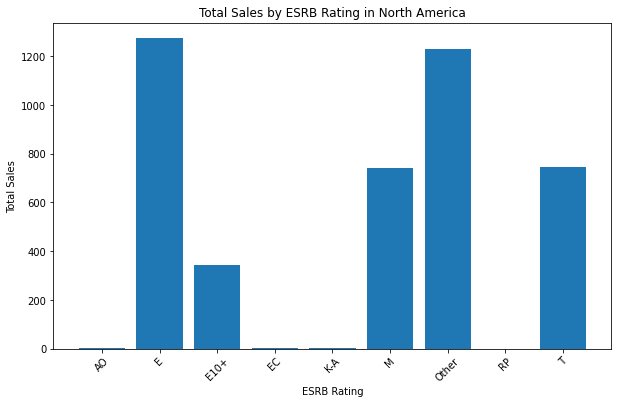

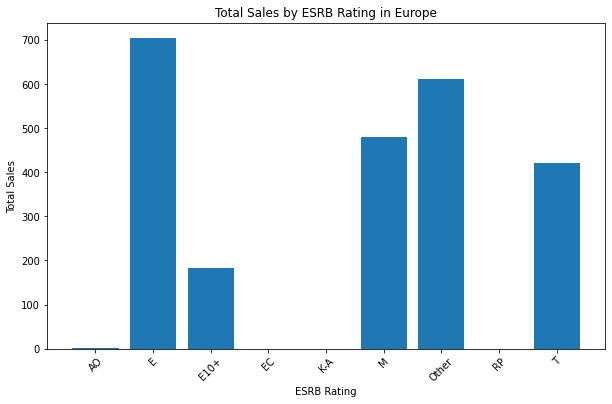

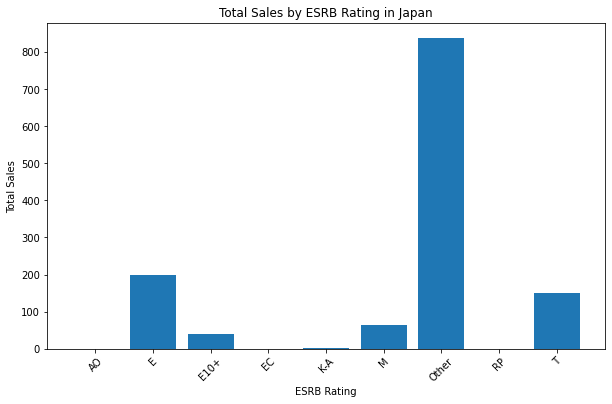

In [62]:
# Группировка данных по рейтингу ESRB и вычисление суммарных продаж для каждого рейтинга в отдельном регионе
sales_by_rating_na = games.groupby('rating')['na_sales'].sum()
sales_by_rating_eu = games.groupby('rating')['eu_sales'].sum()
sales_by_rating_jp = games.groupby('rating')['jp_sales'].sum()

# Создание графика для Северной Америки
plt.figure(figsize=(10, 6))
plt.bar(sales_by_rating_na.index, sales_by_rating_na.values)
plt.title('Total Sales by ESRB Rating in North America')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Создание графика для Европы
plt.figure(figsize=(10, 6))
plt.bar(sales_by_rating_eu.index, sales_by_rating_eu.values)
plt.title('Total Sales by ESRB Rating in Europe')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Создание графика для Японии
plt.figure(figsize=(10, 6))
plt.bar(sales_by_rating_jp.index, sales_by_rating_jp.values)
plt.title('Total Sales by ESRB Rating in Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Промежуточный вывод:**

- Самые популярные платформы в регионе NA:
  - `X360` - `595.74`;
- Самые популярные платформы в регионе EU:
  - `PS2` - `332.63`;
- Самые популярные платформы в регионе JP:
  - `DS` - `175.02`;
- Самые популярные жанры в Северной Америке:
  - `Action` - `863.17`;
- Самые популярные жанры в Европе:
  - `Action` - `510.99`;
- Самые популярные жанры в Японии:
  - `Role-Playing` - `353.39`;
- `ESRB` рейтинг игры влияет на продажи в отдельном регионе.

# Проверьте гипотезы

Нулевая гипотеза (H₀): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза (H₁): Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые;

Уровень значимости: 0.05

In [63]:
# Выборки пользовательских рейтингов для Xbox One и PC
user_scores_xbox_one = games[games['platform'] == 'XOne']['user_score']
user_scores_pc = games[games['platform'] == 'PC']['user_score']

# Проведение t-теста
t_stat, p_value = stats.ttest_ind(user_scores_xbox_one, user_scores_pc, equal_var=False, alternative='two-sided')

# Вывод результатов
print("Значение t-статистики:", t_stat)
print("p-значение:", p_value)

# Проверка статистической значимости результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу. Нет оснований считать, что средние пользовательские рейтинги платформ Xbox One и PC различаются.")


Значение t-статистики: -4.47832879092741
p-значение: 9.706629419847373e-06
Отвергаем нулевую гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC различаются.


H0: Средние пользовательские рейтинги жанров Action и Sports одинаковы.

H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

Уровень значимости: 0.05

In [64]:
# Выборки пользовательских рейтингов для жанров Action и Sports
ratings_action = games[games['genre'] == 'Action']['user_score'].dropna()
ratings_sports = games[games['genre'] == 'Sports']['user_score'].dropna()

# Проведение t-теста для проверки гипотезы о равенстве средних
t_statistic, p_value = stats.ttest_ind(ratings_action, ratings_sports, equal_var=False)

# Уровень значимости
alpha = 0.05

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.")


Значение t-статистики: 1.527609692061009
p-value: 0.1266757167932934
Не отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Промежуточный вывод:**

- Средние пользовательские рейтинги платформ Xbox One и PC различаются;
- Средние пользовательские рейтинги жанров Action и Sports одинаковые.


# Общий вывод

**Вывод:**

**1. В шаге предобработки данных:**
- В исходном файле не оказалось явных дубликатов;
- Названия столбцов приведены в нижний регистр;
- Пустые значения были обнаружены в:
  - name                  2;
  - year_of_release     269;
  - genre                 2;
  - critic_score       8578;
  - user_score         6701;
  - rating             6766.
- Пустые значения были исправлены, путем замены на среднее значения;



**2. В шаге исследовательского анализа данных:**

- Самое большое количество релизов игр было в `2008` - `1427`;
- Наибольшое суммарные продажи были у `PS2` в количестве `1233.56`;
- Удалены данные о релизах до 1960 года;
- Срок появления новых и исчезновение старых платформ происходит в среднем в течении 10 лет;
- Количество строк в данных за последние 3 года: `2233`;
- Топ компания с продажами по платформам это `Wii` - `82.54`;
- Каждая платформа имеет свой уровень успешности;
- Корреляция между отзывами (PS4):
  -  критиков и продажами `0.3490095802924567`
  -  пользователей и продажами `-0.045390861003324096`
- Медианные и средние продажи по жанрам не отличаются. Топ-1 по продажам занимает:
  - `other` - `1.21`.
  

**3. В шаге составления портрета пользователя каждого региона**

- Самые популярные платформы в регионе NA:
  - `X360` - `595.74`;
- Самые популярные платформы в регионе EU:
  - `PS2` - `332.63`;
- Самые популярные платформы в регионе JP:
  - `DS` - `175.02`;
- Самые популярные жанры в Северной Америке:
  - `Action` - `863.17`;
- Самые популярные жанры в Европе:
  - `Action` - `510.99`;
- Самые популярные жанры в Японии:
  - `Role-Playing` - `353.39`;
- `ESRB` рейтинг игры влияет на продажи в отдельном регионе.

**4. В шаге проверки гипотез**


- Самые популярные платформы в регионе NA:
  - `X360` - `595.74`;
- Самые популярные платформы в регионе EU:
  - `PS2` - `332.63`;
- Самые популярные платформы в регионе JP:
  - `DS` - `175.02`;
- Самые популярные жанры в Северной Америке:
  - `Action` - `863.17`;
- Самые популярные жанры в Европе:
  - `Action` - `510.99`;
- Самые популярные жанры в Японии:
  - `Role-Playing` - `353.39`;
- `ESRB` рейтинг игры влияет на продажи в отдельном регионе.